Saving Customer_support_data.csv to Customer_support_data (1).csv
Loaded 85907 tickets
Columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']
Text cleaned
category
GENERAL    85907
Name: count, dtype: int64
priority
P3    85907
Name: count, dtype: int64
SLA calculated
  priority  sla_hours                   due_time
0       P3         24 2025-12-27 11:15:35.716620
1       P3         24 2025-12-27 11:15:35.716620
2       P3         24 2025-12-27 11:15:35.716620
3       P3         24 2025-12-27 11:15:35.716620
4       P3         24 2025-12-27 11:15:35.716620
TICKET SUMMARY
priority     P3
category       
GENERAL   85907


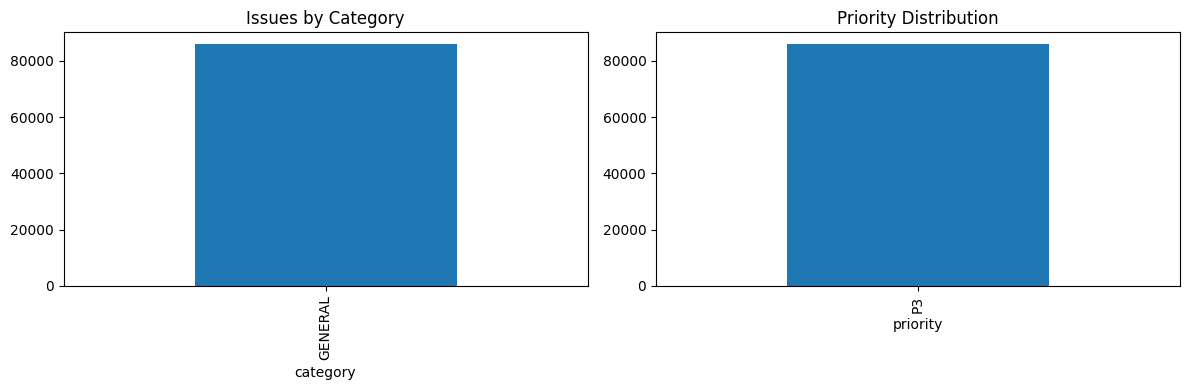

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files ready for GitHub


In [2]:
!pip install pandas numpy matplotlib seaborn -q
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"Loaded {df.shape[0]} tickets")
print("Columns:", list(df.columns))
text_col = [col for col in df.columns if df[col].dtype=='object'][0]
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return re.sub(r'\s+', ' ', text).strip()

df['clean_text'] = df[text_col].apply(clean_text)
print("Text cleaned")
def classify_issue(text):
    text = str(text).lower()
    if any(w in text for w in ['payment','pay','charge','billing']):
        return 'PAYMENT'
    elif any(w in text for w in ['login','password','account']):
        return 'LOGIN'
    elif any(w in text for w in ['delivery','ship','order']):
        return 'DELIVERY'
    elif 'refund' in text:
        return 'REFUND'
    elif any(w in text for w in ['bug','error','crash']):
        return 'BUG'
    return 'GENERAL'

df['category'] = df['clean_text'].apply(classify_issue)
print(df['category'].value_counts())
def assign_priority(text):
    text = str(text).lower()
    if any(w in text for w in ['urgent','emergency']):
        return 'P0'
    elif any(w in text for w in ['cannot','broken','failed']):
        return 'P1'
    elif any(w in text for w in ['slow','delay']):
        return 'P2'
    return 'P3'

df['priority'] = df['clean_text'].apply(assign_priority)
print(df['priority'].value_counts())
sla_map = {'P0':2, 'P1':4, 'P2':8, 'P3':24}
df['sla_hours'] = df['priority'].map(sla_map)
df['ticket_time'] = pd.to_datetime('now')
df['due_time'] = df['ticket_time'] + pd.to_timedelta(df['sla_hours'], unit='h')
print("SLA calculated")
print(df[['priority','sla_hours','due_time']].head())
print("TICKET SUMMARY")
print(df.groupby(['category','priority']).size().unstack(fill_value=0))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['category'].value_counts().plot(kind='bar')
plt.title('Issues by Category')
plt.subplot(1,2,2)
df['priority'].value_counts().plot(kind='bar')
plt.title('Priority Distribution')
plt.tight_layout()
plt.show()
output = df[['category','priority','sla_hours','ticket_time','due_time','clean_text']]
output.columns = ['Issue','Priority','SLA_Hours','Created','Due','Message']
output.to_csv('triage_output.csv', index=False)
files.download('triage_output.csv')



